# Project 5: New York's 2019 Volunteer Analysis

### Problem Statement

Going into 2022, the city of New York is trying to identify ways to improve engagement and ensure more volunteers for the upcoming year. 

Utilizing New York's 2019 Volunteers Count Report Boroughs, this project aims to explore the volunteer count compared to area, organization type, interest areas, and boroughs served, to see if there is a relationship between the amount of volunteers and these features

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Conclusion](#Conclusion)

### Background

"The annual NYC Volunteers Count report is the City’s largest scan of residents volunteering at organizations across New York City. Organizations, including City agencies, Mayoral offices, and nonprofits, are surveyed  to understand how residents volunteer within the city’s infrastructure to strengthen communities at the neighborhood level. Each year, we aim to survey as many organizations that engage volunteers in service as possible to include the diversity of services provided and the number of residents civically engaged as volunteers.  We’re looking for all types of organizations to complete it to ensure we’re telling the full story of volunteerism in NYC.   [source](https://www.nycservice.org/pages/pages/151)."

### Data Used:

The dataset we will be using is from [`data.world`](https://data.world/city-of-ny/72r6-mtgs).
- [`2019-volunteers-count-report-boroughs-1.csv`](../datasets/2019-volunteers-count-report-boroughs-1.csv): 2019 Volunteers Count Report Boroughs

### Data Import & Cleaning

In [151]:
!pip install smogn

In [152]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import smogn

In [153]:
# Read in the Dataset
df = pd.read_csv('../datasets/2019-volunteers-count-report-boroughs-1.csv')
#pd.options.display.max_columns = 100
#pd.options.display.max_rows = 200
#pd.set_option("display.max_rows", None)
df.head()

,Organization/ City Agency/ Division Name,Street Address/Mailing Address,City,State,Postcode,Year Surveyed,Total Vounteers,Youth volunteers,Adult Volunteers,Older adult Volunteers,...,Boroughs Served,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209,2019,500,200,260,40,...,All Boroughs,BROOKLYN,40.624082,-74.024838,310.0,43.0,142.0,3152153.0,3.060090e+09,Bay Ridge
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215,2019,803,0,759,44,...,All Boroughs,BROOKLYN,40.671365,-73.984492,306.0,39.0,137.0,3021351.0,3.009870e+09,Park Slope-Gowanus
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281,2019,774,38,0,0,...,MN,MANHATTAN,40.711425,-74.015442,101.0,1.0,31704.0,1000057.0,1.000160e+09,Battery Park City-Lower Manhattan
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201,2019,58,0,58,0,...,BK,BROOKLYN,40.686827,-73.990412,302.0,33.0,43.0,3001229.0,3.001930e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453,2019,2,0,2,0,...,BX,BRONX,40.846089,-73.909879,205.0,14.0,22701.0,2007858.0,2.028228e+09,Mount Hope


In [154]:
# Shape of Dataset
df.shape

(544, 23)

In [155]:
# Descriptive Statistics
df.describe()

,Postcode,Year Surveyed,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,544.000000,544.0,500.000000,500.000000,500.000000,500.000000,500.000000,4.970000e+02,4.970000e+02
mean,10702.069853,2019.0,40.734725,-73.950657,227.368000,17.524000,5525.380000,2.308925e+06,2.230861e+09
std,2376.964346,0.0,0.067414,0.071670,131.236713,15.583424,20072.745251,1.371566e+06,1.314382e+09
min,7102.000000,2019.0,40.509084,-74.220930,101.000000,1.000000,1.000000,1.000000e+06,1.000020e+09
25%,10018.000000,2019.0,40.699988,-73.993563,105.000000,3.000000,71.000000,1.037556e+06,1.008698e+09
50%,10314.000000,2019.0,40.734243,-73.968358,205.000000,11.000000,179.500000,2.009713e+06,2.028270e+09
75%,11217.000000,2019.0,40.769303,-73.917277,314.000000,33.000000,502.250000,3.337274e+06,3.062720e+09
max,60201.000000,2019.0,40.912828,-73.721118,503.000000,51.000000,157101.000000,5.141743e+06,5.076640e+09


In [156]:
# Datatypes in Dataframe
df.dtypes

Organization/ City Agency/ Division Name     object
Street Address/Mailing Address               object
City                                         object
State                                        object
Postcode                                      int64
Year Surveyed                                 int64
Total Vounteers                              object
Youth volunteers                             object
Adult Volunteers                             object
Older adult Volunteers                       object
Organization Type                            object
Interest Areas                               object
Special Populations Served                   object
Boroughs  Served                             object
Borough                                      object
Latitude                                    float64
Longitude                                   float64
Community Board                             float64
Council District                            float64
Census Tract

We will change the `Total Vounteers`, `Youth volunteers`, `Adult Volunteers`, and `Older adult Volunteers` from object to float.

In [157]:
df.isnull().sum()

Organization/ City Agency/ Division Name     0
Street Address/Mailing Address               0
City                                         0
State                                        0
Postcode                                     0
Year Surveyed                                0
Total Vounteers                              0
Youth volunteers                             0
Adult Volunteers                             0
Older adult Volunteers                       0
Organization Type                            1
Interest Areas                               1
Special Populations Served                   0
Boroughs  Served                             0
Borough                                     44
Latitude                                    44
Longitude                                   44
Community Board                             44
Council District                            44
Census Tract                                44
BIN                                         47
BBL          

Looking at the null values, we see that there are some columns that have null values. Due to our problem statement, we will not be needing all of the columns provided. We will first drop features that are not necessary for this problem statement then we will look further into the null values.

In [158]:
# Lowercase Column Names
df.columns = map(str.lower, df.columns)

In [159]:
# Changing Column Names
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns={'organization/_city_agency/_division_name':'organization_name',
              'street_address/mailing_address':'street_address',
              'boroughs__served':'boroughs_served',
              'total_vounteers':'total_volunteers'})

In [160]:
df.columns

Index(['organization_name', 'street_address', 'city', 'state', 'postcode',
       'year_surveyed', 'total_volunteers', 'youth_volunteers',
       'adult_volunteers', 'older_adult_volunteers', 'organization_type',
       'interest_areas', 'special_populations_served', 'boroughs_served',
       'borough', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta'],
      dtype='object')

In [161]:
# Changing object to float
numeric_columns = ['total_volunteers', 'youth_volunteers',
       'adult_volunteers', 'older_adult_volunteers']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [162]:
# Dropping Columns
df = df.drop(columns=['latitude', 'longitude', 'census_tract', 'bbl', 'bin', 'borough', 'community_board',
                     'council_district', 'nta'])

In [163]:
df.isnull().sum()

organization_name             0
street_address                0
city                          0
state                         0
postcode                      0
year_surveyed                 0
total_volunteers              1
youth_volunteers              1
adult_volunteers              1
older_adult_volunteers        1
organization_type             1
interest_areas                1
special_populations_served    0
boroughs_served               0
dtype: int64

In [164]:
# Looking into total_volunteers
df[df['total_volunteers'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
352,NYC Parks,830 Fifth Ave,New York,NY,10065,2019,NaN,0.0,0.0,0.0,City agency,"Children and youth related, Environment and su...","Immigrants and/or refugees, Justice-involved i...",All Boroughs


Because the total volunteer count is 0, this charity is not relevant to our problem statement. Therefore, we will remove this row.

In [165]:
# Remove Row
df = df.drop(df[df['organization_name']=='NYC Parks'].index)

In [166]:
# Looking into youth_volunteers
df[df['youth_volunteers'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
530,West Side Campaign Against Hunger,263 West 86th Street,New York,NY,10024,2019,1865.0,NaN,NaN,NaN,Community-based organization,"Employment and workforce development, Homeless...",Low-income populations,"MN, BX"


In [167]:
# Looking into older_adult_volunteers
df[df['older_adult_volunteers'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
530,West Side Campaign Against Hunger,263 West 86th Street,New York,NY,10024,2019,1865.0,NaN,NaN,NaN,Community-based organization,"Employment and workforce development, Homeless...",Low-income populations,"MN, BX"


In [168]:
# Looking into adult_volunteers
df[df['adult_volunteers'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
530,West Side Campaign Against Hunger,263 West 86th Street,New York,NY,10024,2019,1865.0,NaN,NaN,NaN,Community-based organization,"Employment and workforce development, Homeless...",Low-income populations,"MN, BX"


We will impute 0 into the youth, adult, and older volunteers column that have NaN values. We decided to impute 0 because looking at other rows, there are many columns where organizations only have the total volunteers. Because of this, it would not make sense to do the mean or median numbers for youth, adult and older adult volunteers.

In [169]:
# Filling NaN with 0
df = df.fillna(0)

In [170]:
df[df['organization_type'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served


Based on our research, the John Paul II Friendship Center is a Senior Center [source](https://hitesite.org/resource/2832). We will insert "Senior Center" for the organization type.

In [171]:
# Changing organization to Senior Center
df[['organization_type']] = df[['organization_type']].fillna(value='Senior Center')

In [172]:
df[df['interest_areas'].isnull()]

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served


In [173]:
df[['interest_areas']] = df[['interest_areas']].fillna(value='Education and literacy')

Based on our research, we found that buildOn focuses on education and literacy, so we filled the NaN value in interest area as "Education and literacy" [source](https://www.buildon.org/).

As we were filling out the NaN data, we noticed there were more rows that had 0 for the breakdown of volunteers.

In [174]:
df[df['youth_volunteers']==0].head()

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215,2019,803.0,0.0,759.0,44.0,Community-based organization,"Children and youth related, Education and lite...","Immigrants and/or refugees, Low-income populat...",All Boroughs
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201,2019,58.0,0.0,58.0,0.0,"Community-based organization, Volunteer-led group","Arts and culture, Children and youth related",Youth (17 or under),BK
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453,2019,2.0,0.0,2.0,0.0,Foster care Agency,"Children and youth related, Employment and wor...","Low-income populations, Youth (17 or under)",BX
5,ABSW Senior Center,221 West 107 Street,New York,NY,10025,2019,6.0,0.0,1.0,5.0,Community-based organization,"Advocacy and organizing, Arts and culture, Civ...",Older adults (60 or older),MN
8,Administration for Children's Services,150 William Street,New York,NY,10038,2019,340.0,0.0,0.0,0.0,City agency,"Advocacy and organizing, Children and youth re...","Immigrants and/or refugees, Justice-involved i...",All Boroughs


We discovered that the total of volunteer numbers were 649429, but the total breakdown number was 261515. Also, there wasn't uniformity in the disparity. So, instead of utilzing all the breakdown of volunteers, we will only use the total volunteers column.

In [175]:
# Making sure there are no more null values
df.isnull().sum()

organization_name             0
street_address                0
city                          0
state                         0
postcode                      0
year_surveyed                 0
total_volunteers              0
youth_volunteers              0
adult_volunteers              0
older_adult_volunteers        0
organization_type             0
interest_areas                0
special_populations_served    0
boroughs_served               0
dtype: int64

### Exploratory Data Analysis

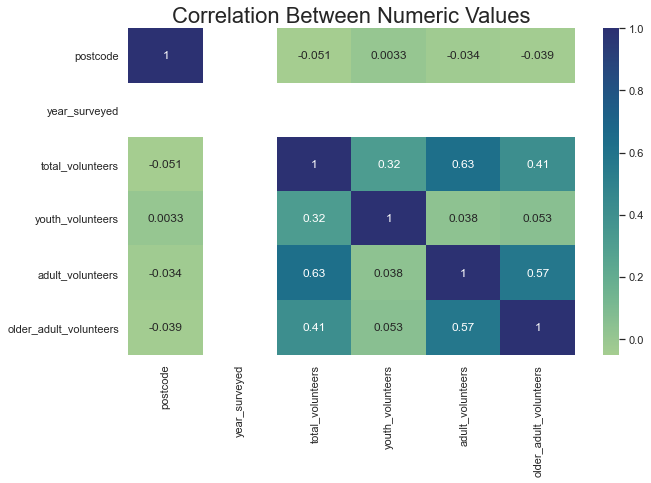

In [176]:
# Correlation Heatmap
plt.figure(figsize = (10,6))
plt.title('Correlation Between Numeric Values', fontsize = 22)
sns.heatmap(df.corr(), cmap="crest", annot=True);

In [177]:
# Correlation of total_volunteers with numeric values
df.corr()['total_volunteers'].sort_values(ascending=False)

total_volunteers          1.000000
adult_volunteers          0.627337
older_adult_volunteers    0.414112
youth_volunteers          0.317049
postcode                 -0.050934
year_surveyed                  NaN
Name: total_volunteers, dtype: float64

Looking at the heatmap and correlation for `total_volunteers`, there does not seem to be any highly positive or negative correlations. The highest correlations are with the sub-sections and breakdown of volunteers.

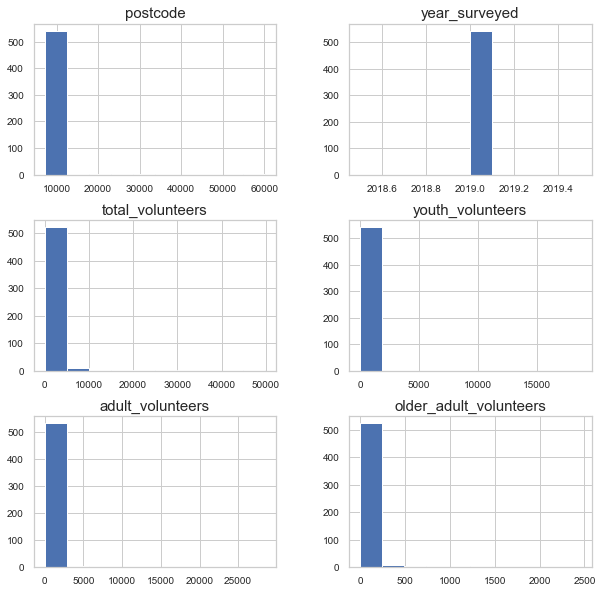

In [178]:
# Histogram for Numeric Values
params = {'axes.titlesize':'15',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10'}
plt.rcParams.update(params)
df.hist(figsize=(10,10));

Looking at the above histograms, we do not see any normal distributions.

####  `interest_areas` and `organization_type`

Because the features `interest_areas` and `organization_type` are strings where each interest area or organization type are separated by a comma, we will split the strings so that we can dummify each string and create separate features. There are also many duplicated interest areas and organization types that are the same, but worded differently, ("non profit" vs. "not for profit" vs. "Non-profit").

In [179]:
# Splitting interest_areas and seeing the breakdown of each category
df['interest_areas'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Arts and culture,Children and youth related,Education and literacy,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Children and youth related,Education and literacy,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Arts and culture,Education and literacy,Memorial,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Arts and culture,Children and youth related,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Children and youth related,Employment and workforce development,Health and medicine,Immigrants and/or refugees,LGBTQIA+,People with disabilities,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Senior Services,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
540,Advocacy and organizing,Arts and culture,Education and literacy,Employment and workforce development,Faith-based,Human rights,Human services,Immigrants and/or refugees,Justice-related,Black & Latino Men issues,...,None,None,None,None,None,None,None,None,None,None
541,Education and literacy,Employment and workforce development,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
542,Children and youth related,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [180]:
# Splitting and seeing the breakdown of each special populations served
df['special_populations_served'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Immigrants and/or refugees,Justice-involved individuals,Low-income populations,Youth (17 or under),PUBLIC SCHOOL STUDENTS,None,None,None,None,None,None,None,None
1,Immigrants and/or refugees,Low-income populations,Women,Youth (17 or under),None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Youth (17 or under),None,None,None,None,None,None,None,None,None,None,None,None
4,Low-income populations,Youth (17 or under),None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Older adults (60 or older),None,None,None,None,None,None,None,None,None,None,None,None
540,Immigrants and/or refugees,Justice-involved individuals,Low-income populations,Men of color 18+,None,None,None,None,None,None,None,None,None
541,Justice-involved individuals,Low-income populations,Out of school youth ages 17-24,None,None,None,None,None,None,None,None,None,None
542,Youth (17 or under),None,None,None,None,None,None,None,None,None,None,None,None


In [181]:
# Removing buildON because of null values
df[df['organization_name']=='buildOn']
df.drop(59, inplace=True)

In [182]:
df['interest_areas'] = df['interest_areas'].str.replace(r'voting,','voting')

In [183]:
# Function to split and strip `interest_areas` before dummifying and exploding the column
new_col = []
for x in df['interest_areas']:
    row = x.split(',')
    new_row = []
    for item in row:
         new_row.append(item.strip().lower())
    new_col.append(','.join(new_row))

In [184]:
# `interest_areas` exploded value counts
interest_areas_split = pd.Series(new_col).str.split(",").explode().value_counts().sort_values()
interest_areas_split.head()

emergency food and social services    1
etc.                                  1
care management                       1
holocaust survivors                   1
community based mental health         1
dtype: int64

In [185]:
# `interest_areas` exploded 
interest_areas_split_total = pd.Series(new_col).str.split(",").explode().sort_values()
interest_areas_split_total.head()

367        accessing resources
265    advocacy and organizing
260    advocacy and organizing
259    advocacy and organizing
254    advocacy and organizing
dtype: object

In [186]:
# Dummifying interest_areas
interest_areas_split_total = pd.get_dummies(interest_areas_split_total)
interest_areas_split_total = interest_areas_split_total.groupby(interest_areas_split_total.index).sum()
interest_areas_split_total.head()


,accessing resources,advocacy and organizing,affordable housing,affordable housing and housing preservation,agency for youth,all aspect of environmental protection,and awareness,animals,areas of focus geared to support our veterans' community with information,arts and culture,...,veterans,veterans homeless,veterans services,victim services,volunteer mobilization,vulnerable populations,we serve all new yorkers in need,weekly meal program,wellness and fitness,women's issues
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
# Only having interest_areas that are have more than 10 organizations
interest_areas_split_total = interest_areas_split_total[interest_areas_split_total.columns[interest_areas_split_total.sum()>10]]

[Code Source](https://stackoverflow.com/questions/33990495/delete-a-column-in-a-pandas-dataframe-if-its-sum-is-less-than-x)

In [188]:
interest_areas_split_total.columns

Index(['advocacy and organizing', 'animals', 'arts and culture',
       'children and youth related',
       'civic engagement (voting voter registration)',
       'education and literacy', 'emergency management and disaster response',
       'employment and workforce development',
       'environment and sustainability', 'faith-based', 'health and medicine',
       'homeless and shelter', 'human rights', 'human services',
       'immigrants and/or refugees', 'justice-related', 'legal services',
       'lgbtqia+', 'people with disabilities', 'senior services',
       'women's issues'],
      dtype='object')

In [189]:
# Summary statistics to make sure max is 1 for all columns
interest_areas_split_total.describe()

,advocacy and organizing,animals,arts and culture,children and youth related,civic engagement (voting voter registration),education and literacy,emergency management and disaster response,employment and workforce development,environment and sustainability,faith-based,...,homeless and shelter,human rights,human services,immigrants and/or refugees,justice-related,legal services,lgbtqia+,people with disabilities,senior services,women's issues
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.273063,0.022140,0.236162,0.385609,0.147601,0.348708,0.092251,0.191882,0.162362,0.064576,...,0.112546,0.073801,0.265683,0.188192,0.090406,0.083026,0.101476,0.145756,0.370849,0.110701
std,0.445944,0.147275,0.425115,0.487188,0.355032,0.477002,0.289647,0.394144,0.369123,0.246003,...,0.316329,0.261688,0.442104,0.391226,0.287027,0.276176,0.302237,0.353188,0.483478,0.314051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
# interest_areas_split_total to CSV
interest_areas_split_total.to_csv('../datasets/interest_areas_split_total.csv', index=True)

In [191]:
# Looking at index 225
df.loc[225]

organization_name             John Paul II Friendship Center
street_address                           103 East 7th Street
city                                                New York
state                                                     NY
postcode                                               10009
year_surveyed                                           2019
total_volunteers                                         6.0
youth_volunteers                                         0.0
adult_volunteers                                         0.0
older_adult_volunteers                                   6.0
organization_type                                          0
interest_areas                               Senior Services
special_populations_served        Older adults (60 or older)
boroughs_served                                           MN
Name: 225, dtype: object

In [192]:
# Replacing index 225's organization type from int to string
df.loc[(df.organization_type==0), 'organization_type']='Faith-based institution'

In [193]:
df.loc[225]

organization_name             John Paul II Friendship Center
street_address                           103 East 7th Street
city                                                New York
state                                                     NY
postcode                                               10009
year_surveyed                                           2019
total_volunteers                                         6.0
youth_volunteers                                         0.0
adult_volunteers                                         0.0
older_adult_volunteers                                   6.0
organization_type                    Faith-based institution
interest_areas                               Senior Services
special_populations_served        Older adults (60 or older)
boroughs_served                                           MN
Name: 225, dtype: object

In [194]:
# Function to split and strip `organization_type` before dummifying and exploding the column
new_col_org = []
for x in df['organization_type']:
    row = x.split(',')
    new_row_org = []
    for item in row:
         new_row_org.append(item.strip().lower())
    new_col_org.append(','.join(new_row_org))

In [195]:
# `organization_type` value counts exploded 
organization_type_split = pd.Series(new_col_org).str.split(",").explode().value_counts().sort_values()
organization_type_split.head()

non for profit              1
health care organization    1
ngo                         1
membership organization     1
nonprofit organization      1
dtype: int64

In [196]:
# `organization_type` exploded 
organization_type_split_total = pd.Series(new_col_org).str.split(",").explode().sort_values()
organization_type_split_total = organization_type_split_total.to_frame('organization_type')

In [197]:
# Combining all the "non profits" organization types into one column
organization_type_split_total.organization_type = organization_type_split_total.organization_type.apply(lambda x: 'non profit' if 'profit' in x else x)

[Code Source](https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas)

In [198]:
organization_type_split_total.value_counts()

organization_type                  
community-based organization           346
non profit                              43
volunteer-led group                     41
city agency                             34
hospital                                31
faith-based institution                 22
senior center                           17
college and/or university               13
cultural institution                     3
community garden                         2
museum                                   2
federally qualified health center        2
nursing facility                         1
nursing home                             1
private agency                           1
nursing home & rehab                     1
nyc mayor's office                       1
park conservancy                         1
parks and public spaces                  1
private / public partnership             1
                                         1
public library                           1
public park       

In [199]:
# Dummifying organization_type
organization_type_split_total = pd.get_dummies(organization_type_split_total)
organization_type_split_total = organization_type_split_total.groupby(organization_type_split_total.index).sum()
organization_type_split_total.head()

,organization_type_,organization_type_article 28- nursing home facility,organization_type_arts organization,organization_type_cat rescue and adoption,organization_type_charity,organization_type_city agency,organization_type_coalition of cbos /fbo,organization_type_college and/or university,organization_type_community center,organization_type_community garden,...,organization_type_public/ private partnership,organization_type_quality of life issues,organization_type_senior center,organization_type_senior citizens center,organization_type_senior services,organization_type_social emotional learning,organization_type_social service agency,organization_type_theatre company,organization_type_volunteer-led group,organization_type_zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Summary statistics to make sure max is 1 for all columns
organization_type_split_total.describe()

,organization_type_,organization_type_article 28- nursing home facility,organization_type_arts organization,organization_type_cat rescue and adoption,organization_type_charity,organization_type_city agency,organization_type_coalition of cbos /fbo,organization_type_college and/or university,organization_type_community center,organization_type_community garden,...,organization_type_public/ private partnership,organization_type_quality of life issues,organization_type_senior center,organization_type_senior citizens center,organization_type_senior services,organization_type_social emotional learning,organization_type_social service agency,organization_type_theatre company,organization_type_volunteer-led group,organization_type_zoo
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.00000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.001845,0.001845,0.001845,0.001845,0.001845,0.062731,0.001845,0.023985,0.001845,0.00369,...,0.001845,0.001845,0.031365,0.001845,0.001845,0.001845,0.001845,0.001845,0.075646,0.001845
std,0.042954,0.042954,0.042954,0.042954,0.042954,0.242702,0.042954,0.153144,0.042954,0.06069,...,0.042954,0.042954,0.174464,0.042954,0.042954,0.042954,0.042954,0.042954,0.264675,0.042954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
# organization_type_split_total to CSV
organization_type_split_total.to_csv('../datasets/organization_type_split_total.csv', index=True)

In [202]:
# Concatenate df, interest_areas_split_total, organization_type_split_total
df_2 = pd.concat([df, interest_areas_split_total, organization_type_split_total], axis=1)
df_2.head()

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,...,organization_type_public/ private partnership,organization_type_quality of life issues,organization_type_senior center,organization_type_senior citizens center,organization_type_senior services,organization_type_social emotional learning,organization_type_social service agency,organization_type_theatre company,organization_type_volunteer-led group,organization_type_zoo
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209.0,2019.0,500.0,200.0,260.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215.0,2019.0,803.0,0.0,759.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281.0,2019.0,774.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201.0,2019.0,58.0,0.0,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453.0,2019.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# Checking null values
df_2.isnull().sum()

organization_name                              2
street_address                                 2
city                                           2
state                                          2
postcode                                       2
                                              ..
organization_type_social emotional learning    2
organization_type_social service agency        2
organization_type_theatre company              2
organization_type_volunteer-led group          2
organization_type_zoo                          2
Length: 92, dtype: int64

In [204]:
# Dropping null values based on the organizations that were looked into above
df_3 = df_2.dropna()

In [205]:
df_3.shape

(540, 92)

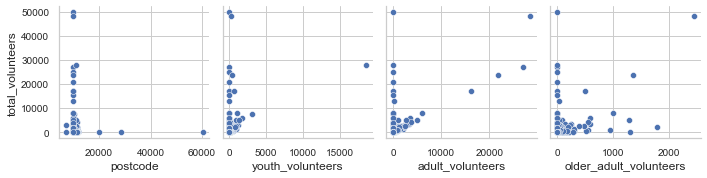

In [206]:
# Pairplot for numerical features
sns.pairplot(data=df_3, y_vars=['total_volunteers'], x_vars=['postcode', 'youth_volunteers', 'adult_volunteers',
                                                          'older_adult_volunteers']);

The above scatter plots represent the numerical features against `total_volunteers`. There are no clear linear relationships.

In [207]:
# Function for bar plots
def create_barplots(x_var, y_var, data, title=''):
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=y_var, y=x_var, data=data.reset_index().head(10))
    ax.set_title(title)

In [208]:
organization_top_vol = df_3.groupby('organization_name').sum().sort_values('total_volunteers', ascending=False)

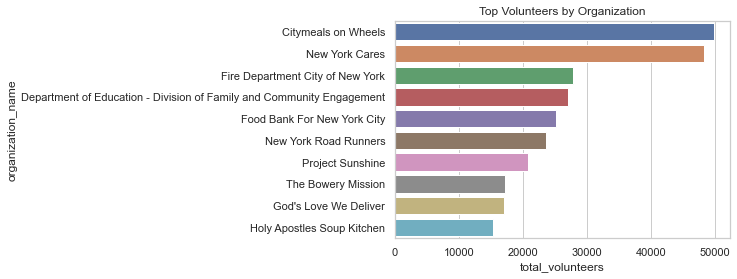

In [209]:
create_barplots('organization_name', 'total_volunteers', organization_top_vol, 'Top Volunteers by Organization')

The top 5 organizations by total volunteers are Citymeals on Wheels, New York Cares, Fire Department City of New York, Department of Education - Division of Family and Community Engagement, and Food Bank for New York City.

#### Organization Types & Interest Areas

In [210]:
# Explode organization_type
org_int = df[['organization_type', 'interest_areas']].copy()
org_int['organization_type'] = org_int['organization_type'].str.split(',')
org_int = org_int.explode(column='organization_type')

In [211]:
# Explode interest_areas
org_int['interest_areas'] = org_int['interest_areas'].str.split(',')
interest_explode = org_int.explode(column='interest_areas')

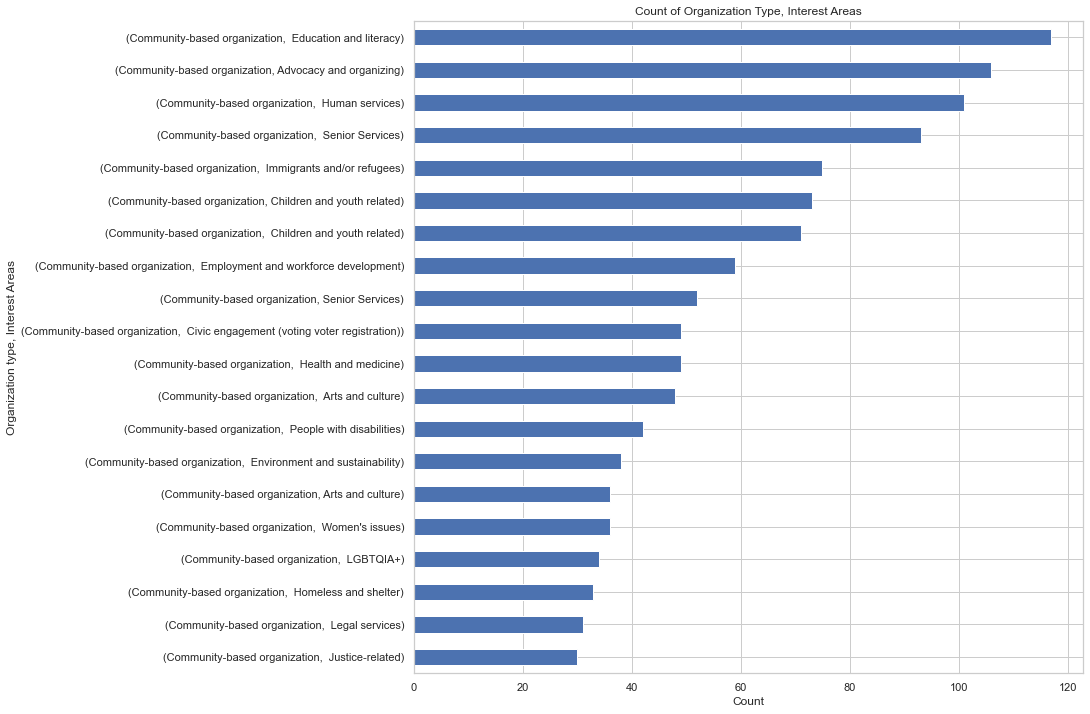

In [212]:
# Groupby and plot
org_int_matrix = interest_explode.groupby(['organization_type', 'interest_areas']).size()
plt.figure(figsize = (12,12))
org_int_matrix.sort_values(0, ascending=False).head(20)[::-1].plot(kind='barh')
plt.title('Count of Organization Type, Interest Areas')
plt.xlabel('Count')
plt.ylabel('Organization type, Interest Areas');

The above bar plot represents the top 20 organization types grouped by interest areas. The plot shows that the top 20 organizations are all community-based organizations with different types of interest areas.

#### Organization Type & Special Populations Served

In [213]:
# Explode organization_type
org_special = df[['organization_type', 'special_populations_served']].copy()
org_special['organization_type'] = org_special['organization_type'].str.split(',')
org_special = org_special.explode(column='organization_type')

In [214]:
# Explode special_populations_served
org_special['special_populations_served'] = org_special['special_populations_served'].str.split(',')
org_special_explode = org_special.explode(column='special_populations_served')

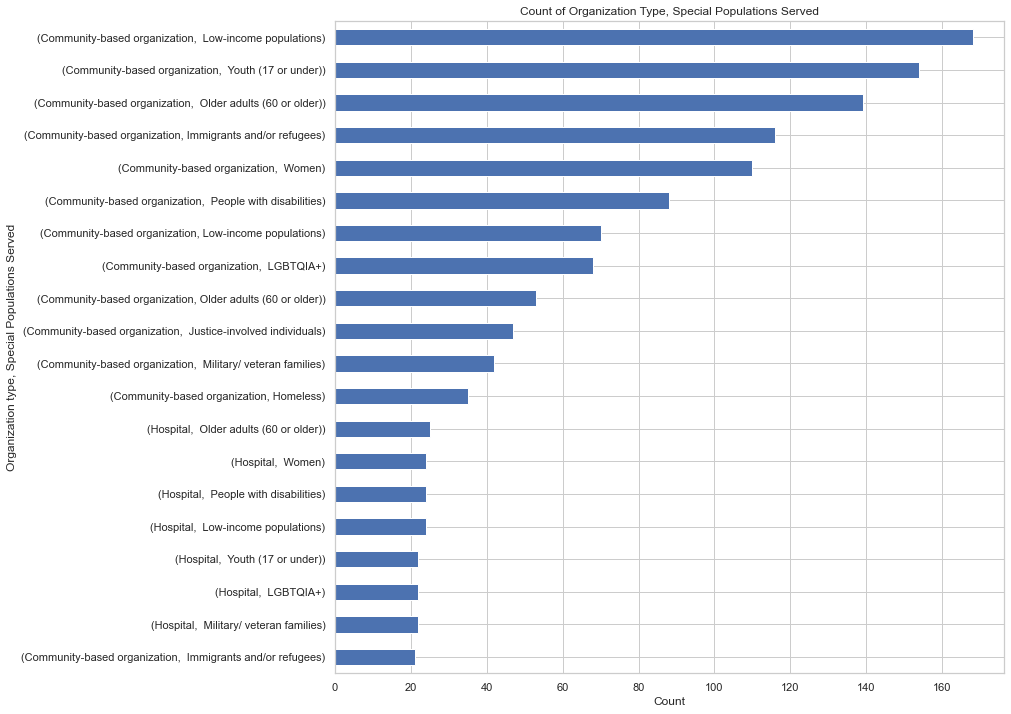

In [215]:
# Groupby and plot
org_special_matrix = org_special_explode.groupby(['organization_type', 'special_populations_served']).size()
plt.figure(figsize = (12,12))
org_special_matrix.sort_values(0, ascending=False).head(20)[::-1].plot(kind='barh')
plt.title('Count of Organization Type, Special Populations Served')
plt.xlabel('Count')
plt.ylabel('Organization type, Special Populations Served');

The above bar plot represents the top organization types grouped by the amount of special populations served. Again, the community-based organizations dominates as organization type.

#### Organization Type & Boroughs Served

In [216]:
# Explode organization_type
org_boroughs = df[['organization_type', 'boroughs_served']].copy()
org_boroughs['organization_type'] = org_boroughs['organization_type'].str.split(',')
org_boroughs = org_boroughs.explode(column='organization_type')

In [217]:
# Explode boroughs_served
org_boroughs['boroughs_served'] = org_boroughs['boroughs_served'].str.split(',')
borough_exploded = org_boroughs.explode(column='boroughs_served')

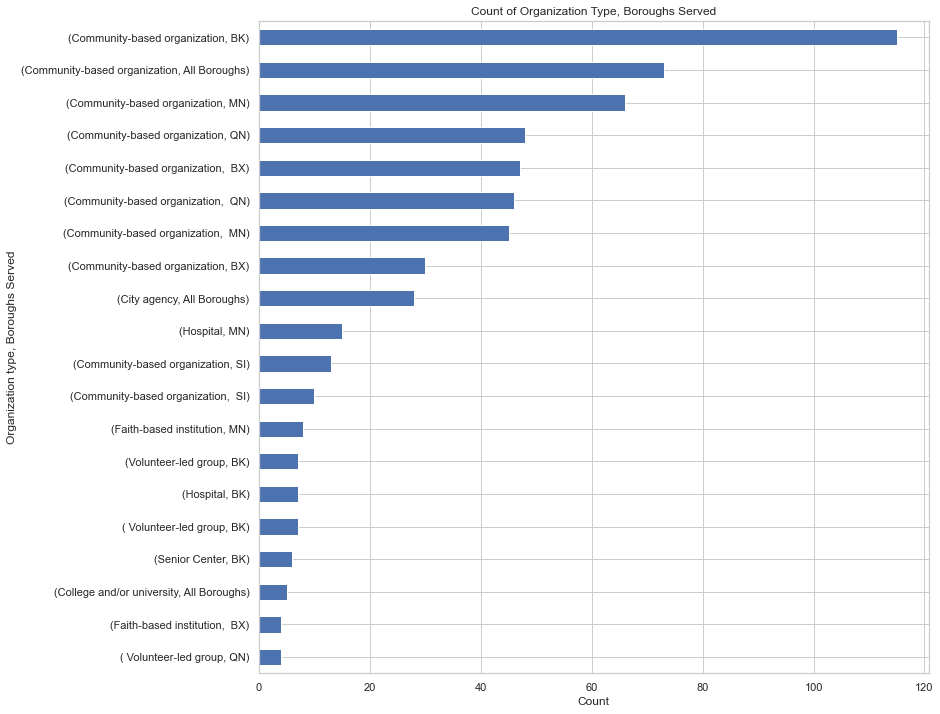

In [218]:
# Groupby and plot
org_boroguh_matrix = borough_exploded.groupby(['organization_type', 'boroughs_served']).size()
plt.figure(figsize = (12,12))
org_boroguh_matrix.sort_values(0, ascending=False).head(20)[::-1].plot(kind='barh')
plt.title('Count of Organization Type, Boroughs Served')
plt.xlabel('Count')
plt.ylabel('Organization type, Boroughs Served');

The above bar plot represents the organization types grouped by the amount of boroughs they serve. The community-based again, dominate the organization types, but the 3 boroughs most represented are Brooklyn, All Boroughs, and Manhattan. 

#### Boroughs Served & Special Populations Served

In [219]:
# Explode boroughs_served
boroughs_special_pop = df[['boroughs_served', 'special_populations_served']].copy()
boroughs_special_pop['boroughs_served'] = boroughs_special_pop['boroughs_served'].str.split(',')
boroughs_special_pop = boroughs_special_pop.explode(column='boroughs_served')

In [220]:
# Explode special_populations_served
boroughs_special_pop['special_populations_served'] = boroughs_special_pop['special_populations_served'].str.split(',')
boroughs_special_pop_explode = boroughs_special_pop.explode(column='special_populations_served')

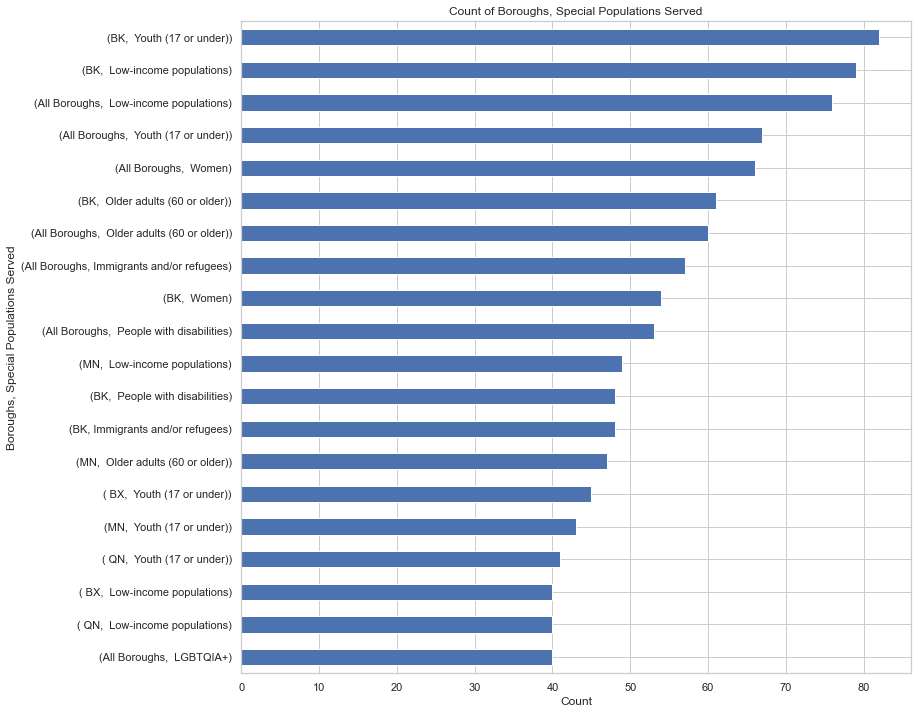

In [221]:
# Groupby and plot
borough_special_matrix = boroughs_special_pop_explode.groupby(['boroughs_served', 'special_populations_served']).size()

plt.figure(figsize = (12,12))
borough_special_matrix.sort_values(0, ascending=False).head(20)[::-1].plot(kind='barh')
plt.title('Count of Boroughs, Special Populations Served')
plt.xlabel('Count')
plt.ylabel('Boroughs, Special Populations Served');

The above bar plot represents the boroughs served grouped by the top special populations served. Brooklyn and All Boroughs are the top boroughs served by organizations. The top special populations served are youth, low-income, women, and older adults.

#### Boroughs Served & Interest Areas

In [222]:
# Explode boroughs_served
boroughs_interest = df[['boroughs_served', 'interest_areas']].copy()
boroughs_interest['boroughs_served'] = boroughs_interest['boroughs_served'].str.split(',')
boroughs_interest = boroughs_interest.explode(column='boroughs_served')

In [223]:
# Explode interest_areas
boroughs_interest['interest_areas'] = boroughs_interest['interest_areas'].str.split(',')
boroughs_interest_explode = boroughs_interest.explode(column='interest_areas')

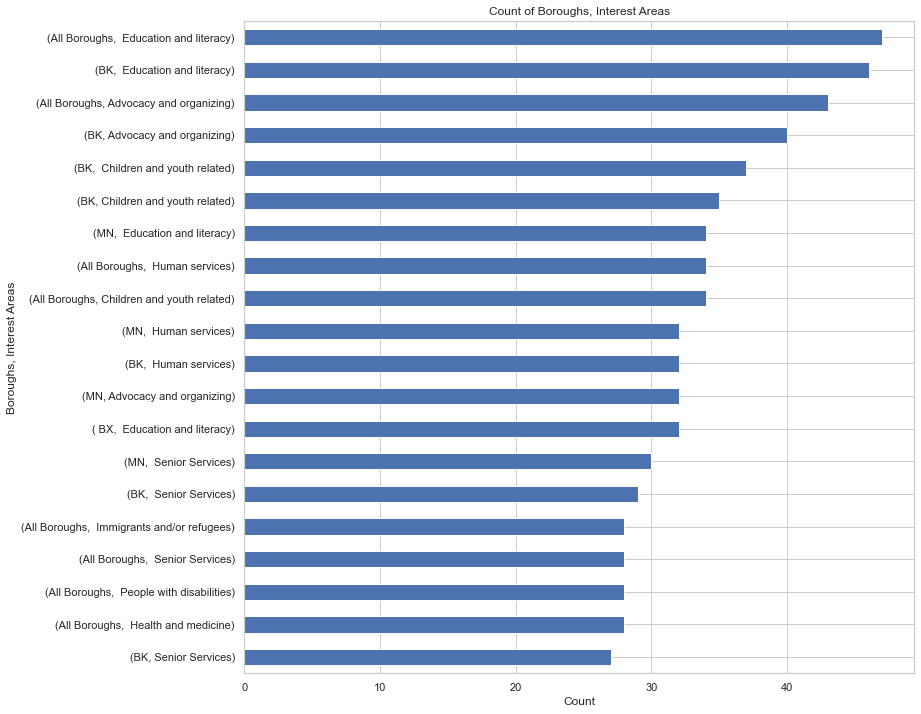

In [224]:
# Groupby and plot
borough_interest_matrix = boroughs_interest_explode.groupby(['boroughs_served', 'interest_areas']).size()

plt.figure(figsize = (12,12))
borough_interest_matrix.sort_values(0, ascending=False).head(20)[::-1].plot(kind='barh')
plt.title('Count of Boroughs, Interest Areas')
plt.xlabel('Count')
plt.ylabel('Boroughs, Interest Areas');

The above bar plot represents the boroughs served grouped by the top interest areas. Again, All Boroughs and Brooklyn are the top boroughs and education and literacy, advocacy and organizing, and children and youth are the top interest areas.

Although there are duplicates in the above bar plots where we used groupby to get the count of features, this is purely for EDA purposes. When we do our modeling, the organization types, interest areas, and boroughs were filtered and combined.

In [225]:
# Combine duplicated boroughs into one
df.boroughs_served = df.boroughs_served.apply(lambda x: 'BX' if 'BX' in x else x)
df.boroughs_served = df.boroughs_served.apply(lambda x: 'MN' if 'MN' in x else x)
df.boroughs_served = df.boroughs_served.apply(lambda x: 'QN' if 'QN' in x else x)
df.boroughs_served = df.boroughs_served.apply(lambda x: 'SI' if 'SI' in x else x)

In [226]:
# Split and explode boroughs
unique_boroughs = df.boroughs_served.dropna().str.split(",").explode()

In [227]:
# Dummify boroughs
unique_boroughs = pd.get_dummies(unique_boroughs)
unique_boroughs = unique_boroughs.groupby(unique_boroughs.index).sum()

In [228]:
unique_boroughs.head()

,All Boroughs,BK,BX,MN,QN,SI
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [229]:
# Boroughs to CSV
unique_boroughs.to_csv('../datasets/unique_boroughs.csv', index=True)

In [230]:
# Concatenate df, interest_areas_split_total, organization_type_split_total
df_4 = pd.concat([df, interest_areas_split_total, organization_type_split_total, unique_boroughs], axis=1)
df_4.head()

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,...,organization_type_social service agency,organization_type_theatre company,organization_type_volunteer-led group,organization_type_zoo,All Boroughs,BK,BX,MN,QN,SI
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209.0,2019.0,500.0,200.0,260.0,40.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215.0,2019.0,803.0,0.0,759.0,44.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281.0,2019.0,774.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201.0,2019.0,58.0,0.0,58.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453.0,2019.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [231]:
# The same null values from above
df_4.isnull().sum().head()

organization_name    2
street_address       2
city                 2
state                2
postcode             2
dtype: int64

In [232]:
# Removing null values
df_5 = df_4.dropna()
df_5.head()

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,...,organization_type_social service agency,organization_type_theatre company,organization_type_volunteer-led group,organization_type_zoo,All Boroughs,BK,BX,MN,QN,SI
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209.0,2019.0,500.0,200.0,260.0,40.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215.0,2019.0,803.0,0.0,759.0,44.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281.0,2019.0,774.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201.0,2019.0,58.0,0.0,58.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453.0,2019.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [233]:
df_5.isnull().sum()

organization_name    0
street_address       0
city                 0
state                0
postcode             0
                    ..
BK                   0
BX                   0
MN                   0
QN                   0
SI                   0
Length: 98, dtype: int64

In [234]:
# df_5 to CSV
df_5.to_csv('../datasets/df_5.csv', index=True)

In [235]:
# Drop columns that will not be used in modeling
df_5 = df_5.drop(columns=['organization_name', 'street_address', 'city', 'state', 'postcode','year_surveyed', 'youth_volunteers', 'adult_volunteers', 'older_adult_volunteers','organization_type', 'interest_areas', 'special_populations_served', 'boroughs_served'])

#### Top Cities Surveyed

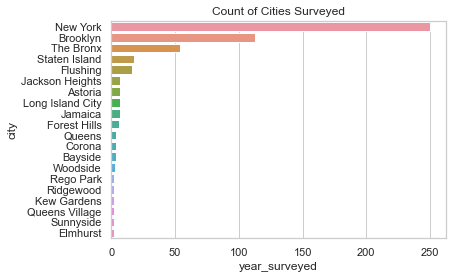

In [236]:
top_cities = df.loc[:,['city','year_surveyed']].groupby(['city']).count()['year_surveyed'].reset_index().sort_values('year_surveyed',ascending = False).head(20)
sns.barplot(x = 'year_surveyed', y = 'city', data = top_cities).set_title('Count of Cities Surveyed');

New York, Brooklyn, and The Bronx are the most represented cities surveyed.

In [237]:
for col in df_2.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df_2[col].value_counts().head(10))

----------------------------------------organization_name---------------------------------------- - 

Community Health Action of Staten Island    2
Turkish Cultural Center                     1
Youth Action YouthBuild East Harlem         1
New York Blood Center                       1
V - ELMS                                    1
Venture House                               1
PowerHouse Kids                             1
GrowNYC                                     1
Earth Matter NY, Inc.                       1
ABSW Senior Center                          1
Name: organization_name, dtype: int64

----------------------------------------street_address---------------------------------------- - 

253 Broadway                     3
42-09 28th Street                2
4 W 43 Street, Suite 407         2
1 Centre Street                  2
253 Broadway, 8th Floor          2
841 Broadway, Suite 301          2
451 Clarkson Avenue              2
720 East New York Avenue         2
2 Washington ST, 17th Floor      1
12 MetroTech Center- 29th Fl.    1
Name: street_address, dtype: int64

----------------------------------------city---------------------------------------- - 

New York            250
Brooklyn            113
The Bronx            54
Staten Island        18
Flushing             16
Jamaica               7
Astoria               7
Long Island City      7
Jackson Heights       7
Forest Hills          6
Name: city, dtype: int64

----------------------------------------state---------------------------------------- - 

NY    537
NJ      2
NC      1
IL      1
DC      1
Name: state, dtype: int64

----------------------------------------postcode---------------------------------------- - 

10007.0    22
10001.0    18
11201.0    14
10018.0    13
10035.0    12
10004.0    11
10029.0    10
10038.0    10
10002.0     9
11217.0     9
Name: postcode, dtype: int64

----------------------------------------year_surveyed---------------------------------------- - 

2019.0    542
Name: year_surveyed, dtype: int64

----------------------------------------total_volunteers---------------------------------------- - 

15.0     15
10.0     15
20.0     14
100.0    13
25.0     12
5.0      12
30.0     11
50.0     10
60.0      8
7.0       8
Name: total_volunteers, dtype: int64

----------------------------------------youth_volunteers---------------------------------------- - 

0.0      331
5.0       23
10.0      17
2.0       14
3.0       11
1.0       11
20.0       7
30.0       5
200.0      4
40.0       4
Name: youth_volunteers, dtype: int64

----------------------------------------adult_volunteers---------------------------------------- - 

0.0     191
20.0     16
10.0     15
1.0      12
3.0      12
5.0      11
2.0      10
6.0       9
40.0      8
15.0      7
Name: adult_volunteers, dtype: int64

----------------------------------------older_adult_volunteers---------------------------------------- - 

0.0     224
5.0      31
10.0     19
15.0     16
2.0      16
20.0     14
1.0      13
12.0     10
25.0      9
3.0       9
Name: older_adult_volunteers, dtype: int64

----------------------------------------organization_type---------------------------------------- - 

Community-based organization                             300
City agency                                               31
Hospital                                                  30
Volunteer-led group                                       16
Community-based organization, Volunteer-led group         16
Faith-based institution                                   13
College and/or university                                 13
Senior Center                                             13
Community-based organization, Faith-based institution      7
Cultural Institution                                       3
Name: organization_type, dtype: int64

----------------------------------------interest_areas---------------------------------------- - 

Senior Services                                                         67
Health and medicine                                                     24
Children and youth related, Education and literacy                      17
Environment and sustainability                                          15
Children and youth related                                              14
Education and literacy                                                  10
Arts and culture, Children and youth related, Education and literacy     7
Arts and culture                                                         7
Employment and workforce development                                     5
Emergency management and disaster response                               4
Name: interest_areas, dtype: int64

----------------------------------------special_populations_served---------------------------------------- - 

Older adults (60 or older)                                                                                                                                                                                            67
Low-income populations, Youth (17 or under)                                                                                                                                                                           31
Youth (17 or under)                                                                                                                                                                                                   26
Immigrants and/or refugees, Justice-involved individuals, LGBTQIA+, Low-income populations, Military/ veteran families, Older adults (60 or older), People with disabilities, Women, Youth (17 or under)              20
None                                                                                                                                

----------------------------------------boroughs_served---------------------------------------- - 

All Boroughs      148
BK                 82
MN                 78
QN                 60
BX                 44
BK, MN, BX, QN     24
MN, BX             18
SI                 17
BK, MN, BX         15
BK, QN             14
Name: boroughs_served, dtype: int64

----------------------------------------advocacy and organizing---------------------------------------- - 

0.0    394
1.0    148
Name: advocacy and organizing, dtype: int64

----------------------------------------animals---------------------------------------- - 

0.0    530
1.0     12
Name: animals, dtype: int64

----------------------------------------arts and culture---------------------------------------- - 

0.0    414
1.0    128
Name: arts and culture, dtype: int64

----------------------------------------children and youth related---------------------------------------- - 

0.0    333
1.0    209
Name: children and youth related, dtype: int64

----------------------------------------civic engagement (voting voter registration)---------------------------------------- - 

0.0    462
1.0     80
Name: civic engagement (voting voter registration), dtype: int64

----------------------------------------education and literacy---------------------------------------- - 

0.0    353
1.0    189
Name: education and literacy, dtype: int64

----------------------------------------emergency management and disaster response---------------------------------------- - 

0.0    492
1.0     50
Name: emergency management and disaster response, dtype: int64

----------------------------------------employment and workforce development---------------------------------------- - 

0.0    438
1.0    104
Name: employment and workforce development, dtype: int64

----------------------------------------environment and sustainability---------------------------------------- - 

0.0    454
1.0     88
Name: environment and sustainability, dtype: int64

----------------------------------------faith-based---------------------------------------- - 

0.0    507
1.0     35
Name: faith-based, dtype: int64

----------------------------------------health and medicine---------------------------------------- - 

0.0    428
1.0    114
Name: health and medicine, dtype: int64

----------------------------------------homeless and shelter---------------------------------------- - 

0.0    481
1.0     61
Name: homeless and shelter, dtype: int64

----------------------------------------human rights---------------------------------------- - 

0.0    502
1.0     40
Name: human rights, dtype: int64

----------------------------------------human services---------------------------------------- - 

0.0    398
1.0    144
Name: human services, dtype: int64

----------------------------------------immigrants and/or refugees---------------------------------------- - 

0.0    440
1.0    102
Name: immigrants and/or refugees, dtype: int64

----------------------------------------justice-related---------------------------------------- - 

0.0    493
1.0     49
Name: justice-related, dtype: int64

----------------------------------------legal services---------------------------------------- - 

0.0    497
1.0     45
Name: legal services, dtype: int64

----------------------------------------lgbtqia+---------------------------------------- - 

0.0    487
1.0     55
Name: lgbtqia+, dtype: int64

----------------------------------------people with disabilities---------------------------------------- - 

0.0    463
1.0     79
Name: people with disabilities, dtype: int64

----------------------------------------senior services---------------------------------------- - 

0.0    341
1.0    201
Name: senior services, dtype: int64

----------------------------------------women's issues---------------------------------------- - 

0.0    482
1.0     60
Name: women's issues, dtype: int64

----------------------------------------organization_type_---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_, dtype: int64

----------------------------------------organization_type_article 28- nursing home facility---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_article 28- nursing home facility, dtype: int64

----------------------------------------organization_type_arts organization---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_arts organization, dtype: int64

----------------------------------------organization_type_cat rescue and adoption---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_cat rescue and adoption, dtype: int64

----------------------------------------organization_type_charity---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_charity, dtype: int64

----------------------------------------organization_type_city agency---------------------------------------- - 

0.0    508
1.0     34
Name: organization_type_city agency, dtype: int64

----------------------------------------organization_type_coalition of cbos /fbo---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_coalition of cbos /fbo, dtype: int64

----------------------------------------organization_type_college and/or university---------------------------------------- - 

0.0    529
1.0     13
Name: organization_type_college and/or university, dtype: int64

----------------------------------------organization_type_community center---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_community center, dtype: int64

----------------------------------------organization_type_community garden---------------------------------------- - 

0.0    540
1.0      2
Name: organization_type_community garden, dtype: int64

----------------------------------------organization_type_community-based organization---------------------------------------- - 

1.0    346
0.0    196
Name: organization_type_community-based organization, dtype: int64

----------------------------------------organization_type_community/ public foundation---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_community/ public foundation, dtype: int64

----------------------------------------organization_type_cultural center & botanical garden---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_cultural center & botanical garden, dtype: int64

----------------------------------------organization_type_cultural institution---------------------------------------- - 

0.0    539
1.0      3
Name: organization_type_cultural institution, dtype: int64

----------------------------------------organization_type_cultural/museum---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_cultural/museum, dtype: int64

----------------------------------------organization_type_education---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_education, dtype: int64

----------------------------------------organization_type_faith-based institution---------------------------------------- - 

0.0    520
1.0     22
Name: organization_type_faith-based institution, dtype: int64

----------------------------------------organization_type_federally mandated advocacy program---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_federally mandated advocacy program, dtype: int64

----------------------------------------organization_type_federally qualified health center---------------------------------------- - 

0.0    540
1.0      2
Name: organization_type_federally qualified health center, dtype: int64

----------------------------------------organization_type_film festival---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_film festival, dtype: int64

----------------------------------------organization_type_foster care agency---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_foster care agency, dtype: int64

----------------------------------------organization_type_foundation---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_foundation, dtype: int64

----------------------------------------organization_type_health care organization---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_health care organization, dtype: int64

----------------------------------------organization_type_home health & hospice care---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_home health & hospice care, dtype: int64

----------------------------------------organization_type_hospital---------------------------------------- - 

0.0    511
1.0     31
Name: organization_type_hospital, dtype: int64

----------------------------------------organization_type_human services---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_human services, dtype: int64

----------------------------------------organization_type_k-12 private school---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_k-12 private school, dtype: int64

----------------------------------------organization_type_legal services---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_legal services, dtype: int64

----------------------------------------organization_type_legal services organization---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_legal services organization, dtype: int64

----------------------------------------organization_type_literacy and theater---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_literacy and theater, dtype: int64

----------------------------------------organization_type_membership organization---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_membership organization, dtype: int64

----------------------------------------organization_type_museum---------------------------------------- - 

0.0    540
1.0      2
Name: organization_type_museum, dtype: int64

----------------------------------------organization_type_museum/botanical garden---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_museum/botanical garden, dtype: int64

----------------------------------------organization_type_music school---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_music school, dtype: int64

----------------------------------------organization_type_ngo---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_ngo, dtype: int64

----------------------------------------organization_type_non profit---------------------------------------- - 

0.0    499
1.0     43
Name: organization_type_non profit, dtype: int64

----------------------------------------organization_type_nursing facility---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_nursing facility, dtype: int64

----------------------------------------organization_type_nursing home---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_nursing home, dtype: int64

----------------------------------------organization_type_nursing home & rehab---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_nursing home & rehab, dtype: int64

----------------------------------------organization_type_nyc mayor's office---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_nyc mayor's office, dtype: int64

----------------------------------------organization_type_park conservancy---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_park conservancy, dtype: int64

----------------------------------------organization_type_parks and public spaces---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_parks and public spaces, dtype: int64

----------------------------------------organization_type_private / public partnership---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_private / public partnership, dtype: int64

----------------------------------------organization_type_private agency---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_private agency, dtype: int64

----------------------------------------organization_type_public library---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_public library, dtype: int64

----------------------------------------organization_type_public park---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_public park, dtype: int64

----------------------------------------organization_type_public-private partnership---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_public-private partnership, dtype: int64

----------------------------------------organization_type_public/ private partnership---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_public/ private partnership, dtype: int64

----------------------------------------organization_type_quality of life issues---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_quality of life issues, dtype: int64

----------------------------------------organization_type_senior center---------------------------------------- - 

0.0    525
1.0     17
Name: organization_type_senior center, dtype: int64

----------------------------------------organization_type_senior citizens center---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_senior citizens center, dtype: int64

----------------------------------------organization_type_senior services---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_senior services, dtype: int64

----------------------------------------organization_type_social emotional learning---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_social emotional learning, dtype: int64

----------------------------------------organization_type_social service agency---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_social service agency, dtype: int64

----------------------------------------organization_type_theatre company---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_theatre company, dtype: int64

----------------------------------------organization_type_volunteer-led group---------------------------------------- - 

0.0    501
1.0     41
Name: organization_type_volunteer-led group, dtype: int64

----------------------------------------organization_type_zoo---------------------------------------- - 

0.0    541
1.0      1
Name: organization_type_zoo, dtype: int64

####  Count of Special Populations

In [238]:
# Read in CSV
unique_special_df = pd.read_csv('../datasets/unique_special_pop_total.csv')
unique_special_df.set_index('special_pop_covered', inplace=True)
unique_special_df.head()

,total
special_pop_covered,
Low-income populations,262
Youth (17 or under),243
Older adults (60 or older),227
Women,198
Immigrants and/or refugees,180


Top 5 counts for special populations served.

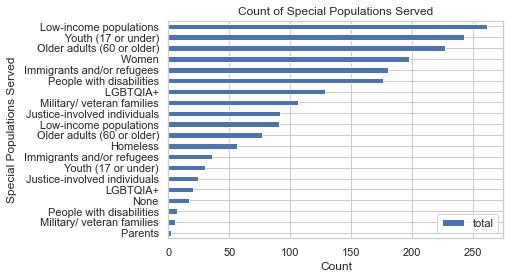

In [239]:
# Count of special_populations_served plotted
unique_special_df.head(20)[::-1].plot(kind='barh')
plt.title('Count of Special Populations Served')
plt.xlabel('Count')
plt.ylabel('Special Populations Served');

Low-income populations, youth (17 or under), older adults (60 or older), women, and immigrants and/or refugees were among the top 5 special populations served.

#### Count of Interest Areas

In [240]:
# Read in CSV
unique_interest_df = pd.read_csv('../datasets/unique_interest_areas_totals.csv')
unique_interest_df.set_index('unique_interest_areas', inplace=True)
unique_interest_df.head()

,total
unique_interest_areas,
Education and literacy,168
Advocacy and organizing,148
Human services,137
Senior Services,132
Children and youth related,105


Top 5 count for interest areas

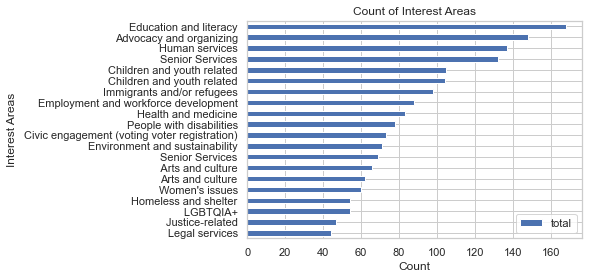

In [241]:
# Count of interest_areas plotted
unique_interest_df.head(20)[::-1].plot(kind='barh')
plt.title('Count of Interest Areas')
plt.xlabel('Count')
plt.ylabel('Interest Areas');

The top 5 interest areas are education and literacy, advocacy and organizing, human services, senior services, and children and youth related.

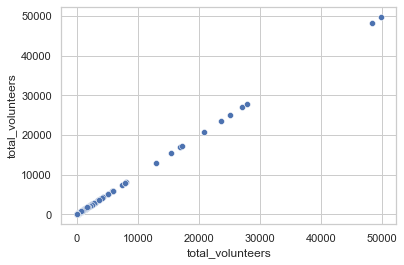

In [242]:
sns.scatterplot(data=df_5, y='total_volunteers', x='total_volunteers');

Looking at the above scatter plot of total volunteers, we noticed that there is a large range of volunteers. The organizations with more than 45,000 volunteers can be seen as outliers when compared to the rest of the dataset. We also noticed that because there is still a large range from 0-30000 volunteers, this could heavily impact our modeling.

### Preprocessing and Modeling

In [92]:
df.head()

,organization_name,street_address,city,state,postcode,year_surveyed,total_volunteers,youth_volunteers,adult_volunteers,older_adult_volunteers,organization_type,interest_areas,special_populations_served,boroughs_served
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209,2019,500.0,200.0,260.0,40.0,Community-based organization,"Arts and culture, Children and youth related, ...","Immigrants and/or refugees, Justice-involved i...",All Boroughs
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215,2019,803.0,0.0,759.0,44.0,Community-based organization,"Children and youth related, Education and lite...","Immigrants and/or refugees, Low-income populat...",All Boroughs
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281,2019,774.0,38.0,0.0,0.0,Museum,"Arts and culture, Education and literacy, Memo...",None,MN
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201,2019,58.0,0.0,58.0,0.0,"Community-based organization, Volunteer-led group","Arts and culture, Children and youth related",Youth (17 or under),BK
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453,2019,2.0,0.0,2.0,0.0,Foster care Agency,"Children and youth related, Employment and wor...","Low-income populations, Youth (17 or under)",BX


In [93]:
df_5.shape

(540, 85)

In [94]:
# Define X and y
X = df_5.drop(columns=['total_volunteers'])
y = df_5['total_volunteers']

In [95]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#### Baseline Linear Regression Score:

In [96]:
# Instantiate and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train) 

# Train Score
print(f'Training Score: {round(lr.score(X_train, y_train), 4)}')

# Test Score
print(f'Testing Score: {round(lr.score(X_test, y_test), 4)}')

Training Score: 0.1813
Testing Score: -1.0796548370385086e+24


In [97]:
# Instantiate StandardScaler
ss = StandardScaler()

# Standardize X_train
Z_train = ss.fit_transform(X_train)

# Standardize X_test
Z_test = ss.transform(X_test)

#### Using PCA:

In [98]:
# Instantiate PCA
pca = PCA(random_state=42) #pca is a transformer, like ss and polynomial features

# Fit PCA on Z_train

# Transform PCA on Z_train
pc_train = pca.fit_transform(Z_train)

# Transform test data
pc_test = pca.transform(Z_test)


In [99]:
pc_train_df = pd.DataFrame(pc_train)
pc_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-1.598180,-0.107384,-0.542690,-1.173394,-0.116733,0.987862,0.364635,0.511938,-0.826385,0.264848,...,2.719988e-16,6.359368e-17,-4.957087e-16,1.280321e-16,1.303349e-16,-3.866537e-17,1.918351e-16,2.070897e-16,4.646360e-17,-4.850185e-16
1,-1.224735,1.103530,0.337969,3.742189,1.947338,0.120205,-1.722171,0.679249,0.798107,1.648004,...,1.242631e-17,3.382520e-18,2.072152e-17,-9.832869e-18,-2.567246e-17,3.230332e-17,-1.676375e-17,-3.082886e-17,-4.176441e-18,1.748427e-17
2,-1.930343,-0.132449,1.197156,-0.621077,-0.203347,-0.913144,1.790802,-0.759094,-1.288914,-2.311417,...,4.971941e-18,8.780751e-19,-1.877895e-16,4.282803e-16,1.285174e-16,-2.140964e-17,9.269012e-17,1.527693e-16,2.142340e-16,-3.292795e-16
3,-0.877392,-0.028952,-1.556768,0.362469,0.926328,0.258518,-0.059534,0.773159,-1.388996,-0.773252,...,2.219767e-16,2.125229e-16,-1.707479e-16,-3.240665e-16,6.632306e-17,-1.956063e-16,1.728598e-16,1.062086e-16,-1.185835e-16,-5.368962e-16
4,-1.635340,0.386798,2.659398,-1.536642,1.593741,1.226326,-0.339688,1.512615,0.226553,0.992524,...,9.383873e-17,-2.215828e-16,-2.634491e-16,2.960474e-16,1.200317e-16,3.635653e-16,-1.760658e-16,2.141665e-16,4.752128e-16,-3.787672e-16


In [100]:
pc_train_df.iloc[:, :5].corr()

,0,1,2,3,4
0,1.000000e+00,-1.105971e-17,-1.421818e-16,-2.977174e-17,1.691855e-16
1,-1.105971e-17,1.000000e+00,-7.000997e-16,-8.631540e-17,-1.781189e-16
2,-1.421818e-16,-7.000997e-16,1.000000e+00,-5.556483e-17,-4.438446e-16
3,-2.977174e-17,-8.631540e-17,-5.556483e-17,1.000000e+00,-4.192112e-16
4,1.691855e-16,-1.781189e-16,-4.438446e-16,-4.192112e-16,1.000000e+00


In [101]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance.sum() 


# Cumulative explained variance
explained_variance_cummulative = np.cumsum(explained_variance)

In [102]:
explained_variance[:50]

array([0.06681608, 0.0313074 , 0.02921759, 0.02805799, 0.02595071,
       0.02520352, 0.02415835, 0.02244807, 0.02199054, 0.02090834,
       0.02006514, 0.01898022, 0.01885909, 0.01813011, 0.01753796,
       0.01686426, 0.0164525 , 0.01616707, 0.01579994, 0.01564394,
       0.01530365, 0.01502314, 0.01487867, 0.01473937, 0.01451538,
       0.01433674, 0.01430645, 0.01421389, 0.01412453, 0.01397809,
       0.01395484, 0.01394513, 0.01393507, 0.01393087, 0.0139258 ,
       0.01392573, 0.01392573, 0.01392573, 0.01392573, 0.01392573,
       0.0135387 , 0.01324023, 0.01302656, 0.01275741, 0.01245899,
       0.01223759, 0.01161706, 0.01109501, 0.01078461, 0.01035221])

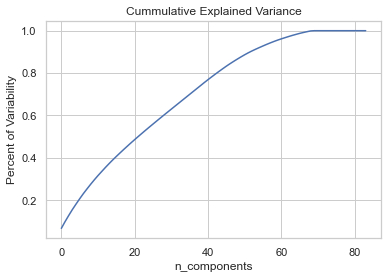

In [103]:
# Plot cummulative explained variance
plt.plot(explained_variance_cummulative)
plt.title('Cummulative Explained Variance')
plt.xlabel('n_components')
plt.ylabel('Percent of Variability');

In [104]:
# Instantiate PCA
pca = PCA(n_components=40, random_state=42) # We chose 40 n_components because that would be 80% of the variability in the data

# Fit PCA to training data
pca.fit(Z_train)

# Instantiate linear regression
lr = LinearRegression()

# Transform Z_train and Z_test
pc_train = pca.transform(Z_train)
pc_test = pca.transform(Z_test)

# Fit on pc_train
lr.fit(pc_train, y_train)

# Training score
print(f'Training Score: {round(lr.score(pc_train, y_train), 4)}')

# Testing score
print(f'Testing Score: {round(lr.score(pc_test, y_test), 4)}')

Training Score: 0.0835
Testing Score: 0.019


In [105]:
# PCA to DataFrame
pca_df = pd.DataFrame(pc_train)
columns = [f'PCA_{i+1}' for i in range(pc_train.shape[1])]
pca_df.columns = columns

pca_df['total_volunteers'] = y_train.values
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,total_volunteers
0,-1.598180,-0.107384,-0.542690,-1.173394,-0.116733,0.987862,0.364635,0.511938,-0.826385,0.264848,...,0.008680,0.018917,0.005009,-0.000396,-1.860880e-15,3.481590e-15,-1.561251e-15,-4.149459e-15,8.854029e-15,35.0
1,-1.224735,1.103530,0.337969,3.742189,1.947338,0.120205,-1.722171,0.679249,0.798107,1.648004,...,3.515106,-0.301652,0.504361,-2.861100,-4.880691e+00,-5.868995e+00,2.488333e+00,4.308942e+00,-5.314282e+00,82.0
2,-1.930343,-0.132449,1.197156,-0.621077,-0.203347,-0.913144,1.790802,-0.759094,-1.288914,-2.311417,...,0.039580,-0.475880,-0.562375,0.017786,2.756730e-13,-8.829222e-14,1.667902e-13,-1.170938e-13,5.828671e-16,1400.0
3,-0.877392,-0.028952,-1.556768,0.362469,0.926328,0.258518,-0.059534,0.773159,-1.388996,-0.773252,...,0.006566,0.009764,0.003649,-0.000302,-5.847180e-15,-9.055257e-15,-1.547373e-15,5.946632e-15,-2.269018e-15,24.0
4,-1.635340,0.386798,2.659398,-1.536642,1.593741,1.226326,-0.339688,1.512615,0.226553,0.992524,...,0.473363,-0.466756,-0.298794,-0.219836,-4.491287e-12,-6.662188e-12,1.800338e-12,4.731882e-12,2.776071e-12,650.0


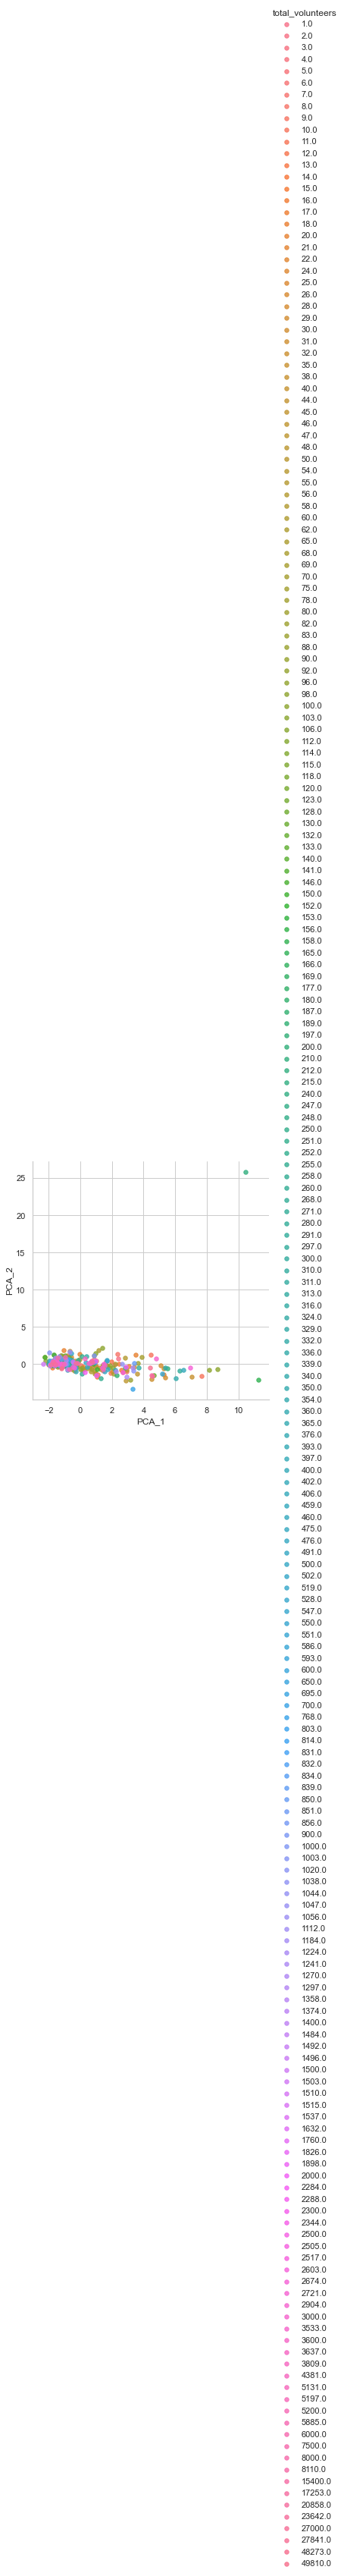

In [106]:
# Visualize PCA_1 vs. PCA_2
# PCA code referenced from Lesson 803
sns.lmplot(
x='PCA_1',
y='PCA_2',
data=pca_df,
fit_reg=False,
hue='total_volunteers',
legend=True,
scatter_kws={'s':30}
)

#### Linear Regression

In [107]:
# Define X and y
X = df_5.drop(columns=['total_volunteers'])
y = df_5['total_volunteers']

In [108]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [109]:
# Instantiate StandardScaler
ss = StandardScaler()

# Standardize X_train
X_train = ss.fit_transform(X_train)

# Standardize X_test
X_test = ss.transform(X_test)

In [110]:
# LR Pipeline
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('pc', PCA(random_state=42)),
    ('lr', LinearRegression())
])

In [111]:
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pc', PCA(random_state=42)),
  ('lr', LinearRegression())],
 'verbose': False,
 'ss': StandardScaler(),
 'pc': PCA(random_state=42),
 'lr': LinearRegression(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pc__copy': True,
 'pc__iterated_power': 'auto',
 'pc__n_components': None,
 'pc__random_state': 42,
 'pc__svd_solver': 'auto',
 'pc__tol': 0.0,
 'pc__whiten': False,
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

In [112]:
df_5.shape

(540, 85)

In [113]:
# Using Gridsearch with PCA
param_grid = {'pc__n_components': range(1, 80, 5)}
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5

)

In [114]:
# Fit Gridsearch
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('pc', PCA(random_state=42)),
                                       ('lr', LinearRegression())]),
             param_grid={'pc__n_components': range(1, 80, 5)})

In [115]:
gs.best_params_

{'pc__n_components': 6}

In [119]:
def train_test_score(model):
    print(f'Best Score: {model.best_score_}')
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')

In [120]:
def rmse(model):
    print(f'Train RMSE: {mean_squared_error(y_true=y_train, y_pred=model.predict(X_train), squared=False)}')
    print(f'Test RMSE: {mean_squared_error(y_true=y_test, y_pred=model.predict(X_test), squared=False)}')

In [121]:
def plot_residuals(model):
    # Prediction and Residuals
    preds = model.predict(X_test)
    residuals = preds - y_test
   
    # Residuals Plot
    plt.scatter(residuals.index, residuals)
    plt.title("Residuals", fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15);

In [122]:
train_test_score(gs)

Best Score: -0.04958726520358277
Train Score: 0.0497253272468724
Test Score: 0.0316267685803433


In [123]:
rmse(gs)

Train RMSE: 4487.482599345687
Test RMSE: 2600.043160159981


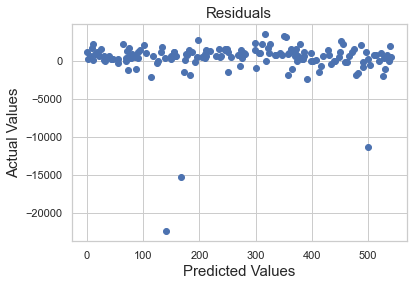

In [124]:
plot_residuals(gs)

#### Random Forest

In [125]:
# Random Forest Pipeline
pipe_rf = Pipeline([('ss', StandardScaler()),
               ('pc', PCA(random_state=42)),
                ('rf', RandomForestRegressor())])

In [126]:
# Random Forest Gridsearch
param_grid = {'pc__n_components': range(1, 80, 5)}
gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=5

)

In [127]:
# Fit Gridsearch
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('pc', PCA(random_state=42)),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'pc__n_components': range(1, 80, 5)})

In [128]:
gs_rf.best_params_

{'pc__n_components': 6}

In [132]:
train_test_score(gs_rf)

Best Score: -0.322920873305155
Train Score: 0.7737819445609317
Test Score: -1.4657647891557928


In [133]:
rmse(gs_rf)

Train RMSE: 2189.4842872106824
Test RMSE: 4148.919348865678


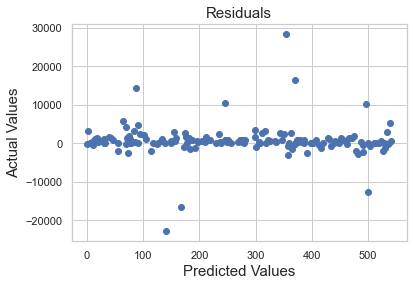

In [134]:
plot_residuals(gs_rf)

After running a baseline model, doing PCA, then running a linear regression and random forest model, we decided to use smogn to help with the small amount of data and uneven distribution of total volunteers.

### SMOGN

In [135]:
df_smogn = smogn.smoter(data=df_5, y='total_volunteers', samp_method='extreme', replace=True, rel_thres=0.5)

r_index: 100%|##########| 79/79 [00:00<00:00, 168.24it/s]


In [136]:
df_smogn.shape

(734, 85)

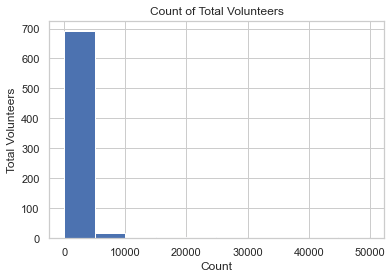

In [137]:
# Histogram of total_volunteers after using SMOGN
df_smogn.hist('total_volunteers')
plt.title('Count of Total Volunteers')
plt.xlabel('Count')
plt.ylabel('Total Volunteers');

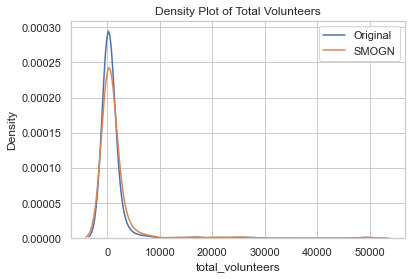

In [138]:
# Density Plot comparing the oversampling
sns.kdeplot(df_5['total_volunteers'], label = "Original")
sns.kdeplot(df_smogn['total_volunteers'], label = "SMOGN")
plt.legend()
plt.title('Density Plot of Total Volunteers');

In [139]:
# df_smogn to CSV
df_smogn.to_csv('../datasets/df_smogn.csv', index=True)

### Random Forest with SMOGN

In [140]:
# Define X and y
X_smote = df_smogn.drop(columns=['total_volunteers'])
y_smote = df_smogn['total_volunteers']

In [141]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.7, random_state=42)

In [142]:
# Random Forest Pipeline
pipe_rf_smogn = Pipeline([('ss', StandardScaler()),
               ('pc', PCA(random_state=42)),
                ('rf', RandomForestRegressor()),
                         ])

In [143]:
# Using Gridsearch with PCA
param_grid = {'pc__n_components': range(1, 80, 5)}
gs_smogn = GridSearchCV(
    estimator=pipe_rf_smogn,
    param_grid=param_grid,
    cv=5

)

In [144]:
# Fit Gridsearch
gs_smogn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('pc', PCA(random_state=42)),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'pc__n_components': range(1, 80, 5)})

In [147]:
train_test_score(gs_smogn)

Best Score: 0.18343917019418401
Train Score: 0.7126810704413367
Test Score: 0.5290077519134248


In [148]:
rmse(gs_smogn)

Train RMSE: 2670.9284609320503
Test RMSE: 3645.5138897795177


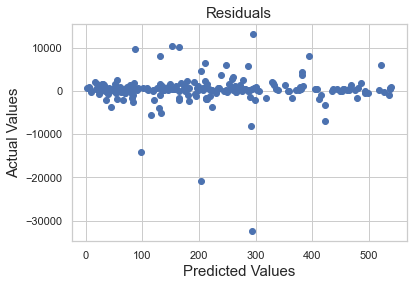

In [149]:
plot_residuals(gs_smogn)

In [150]:
# Using Gridsearch with SMOGN/PCA
param_grid = {'pc__n_components': range(1, 80, 10),
             'rf__max_depth': [50, 70, 90],
                'rf__min_samples_split': [2,5],
                'rf__min_samples_leaf': [1, 2],
    'rf__max_features': [None],
              'rf__n_estimators': [300, 400],
                       }
gs_smogn_2 = GridSearchCV(
    estimator=pipe_rf_smogn,
    param_grid=param_grid,
    cv=3, n_jobs=-1

)

In [151]:
# Fit Gridsearch
gs_smogn_2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('pc', PCA(random_state=42)),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'pc__n_components': range(1, 80, 10),
                         'rf__max_depth': [50, 70, 90],
                         'rf__max_features': [None],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [300, 400]})

In [152]:
gs_smogn_2.best_params_

{'pc__n_components': 11,
 'rf__max_depth': 90,
 'rf__max_features': None,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 400}

In [155]:
train_test_score(gs_smogn_2)

Best Score: 0.2187135170173561
Train Score: 0.6329553135356563
Test Score: 0.4851362310597396


In [156]:
rmse(gs_smogn_2)

Train RMSE: 3018.83660009197
Test RMSE: 3811.5185996499104


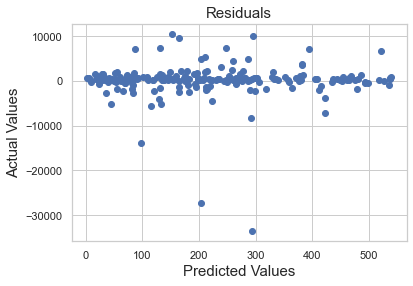

In [157]:
plot_residuals(gs_smogn_2)

### Conclusion

Overall, our models were overfit. With our initial problem statement, we wanted to analyze the different subsets of volunteers (teens, adult, older adults), but found that our dataset had a lot of missing values that did not make this problem statement appropriate. We then decided to focus on interest areas and organization types. Because the input for these sections were based on what the charity entered into the survey, many values were duplicated and/or had many rows that were stating the whole mission statement/sentence for what their interest area or organization type is (example: "non profit" vs. "Non-profit" vs. "not for profit"). This came as a challenge and we decided to remove interet areas that had less than 10 rows. 

With a bunch of exploded and dummified columns, we decided to run PCA to help with dimensionality reduction and help identify important relationships in our data.

We ran a baseline linear regression model, but because the dataset did not adhere to the LINE assumptions, running a linear regression model was not the best model and we decided to run a random forest regressor.

Lastly, we decided to inflate our dataset and oversample the total population to get more data. In conclusion, with the random forest model we ended up with a train score: 0.713 and test score: 0.529 and a train RMSE: 2670.93 and test RMSE: 3645.51. When using a gridsearch for the random forest we got a train score: 0.633 and test score: 0.485 and a train RMSE: 3018.84 and test RMSE: 3811.52. Comparing the two, the gridsearch had less overfitting, but had a higher RMSE than the random forest without gridsearch.


### Next Steps

- Use the `special_populations_served` column in the model by cleaning, exploding and dummify the column
- Further clean the `organization_type` and `interest_areas` column by combining rows that had a value of less than 10 rows if the rows were the same type of organization or interest area. We decided to drop all organization types that had less than 10 rows, but for example, some types could have been combined to create a "food resource" type.
- Bring in more data such as Census data to further investigate relationships of charities in New York